Dataset description :
1. Symptom severity - contains weights showcasing level of effectiveness per 2 days
2. dataset - sympotms witnessed by the body
3. symptom description - description about the disease
4. symptom precatution - precautions to take when you have the disease

In [3]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: mkl, mkl-service, mkl_fft, mkl_random, mkl_umath, tbb4py
Required-by: accelerate, albucore, albumentations, arviz, astropy, autograd, bayesian-optimization, bigframes, blis, blosc2, bokeh, Boruta, Bottleneck, bqplot, Cartopy, catboost, category_encoders, cesium, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cuml-cu12, cupy-cuda12x, cuvs-cu12, cvxpy, dask-cuda, dask-cudf-cu12, datascience, datasets, datashader, db-dtypes, deap, diffusers, dipy, dopamine_rl, easyocr, eli5, fasttext, featuretools, flax, folium, fury, geemap, gensim, geopandas, gym, gymnasium, h5py, hep_ml, holoviews, hyperopt, ibis-framework, ImageHash, imageio, imbalanced-learn, imgaug, ipympl, jax, jaxlib, kaggle-environments, keras, keras-core, keras-hub, lan

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('/kaggle/input/symptom-checker/Training.csv')
data_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
y = data_train['prognosis']
print(set(y))
x = data_train.iloc[:,:-1]

{'Malaria', 'Gastroenteritis', 'AIDS', 'Osteoarthristis', 'Cervical spondylosis', 'Hepatitis E', 'Paralysis (brain hemorrhage)', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia', 'Fungal infection', 'Jaundice', 'Alcoholic hepatitis', 'Common Cold', 'Diabetes ', 'Chronic cholestasis', 'Drug Reaction', 'Migraine', 'Hypertension ', 'Bronchial Asthma', 'Peptic ulcer diseae', 'Heart attack', 'Typhoid', 'Dimorphic hemmorhoids(piles)', 'Varicose veins', 'Hyperthyroidism', 'Impetigo', 'Psoriasis', 'Acne', 'Urinary tract infection', 'Chicken pox', 'Arthritis', 'GERD', 'Hepatitis C', 'Hypothyroidism', 'Hypoglycemia', 'Hepatitis B', 'Tuberculosis', 'Dengue', 'hepatitis A', 'Allergy', 'Hepatitis D'}


In [51]:
vocab = x.columns.tolist()
print(vocab)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [52]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [53]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
test_data = pd.read_csv('/kaggle/input/symptom-checker/Testing.csv')
testx = test_data[vocab]
testy = test_data['prognosis']  
testy = le.transform(testy)

In [64]:
clf  = DecisionTreeClassifier(random_state = 42)
clf = clf.fit(x_train,y_train)

scores = cross_val_score(clf, x_test, y_test, cv=3)

print (scores.mean())

0.9729101727246477


In [74]:
importances = clf.feature_importances_
print(importances)
print(max(importances))

[0.02310793 0.         0.0247345  0.00240835 0.         0.
 0.00152926 0.02171379 0.         0.         0.         0.00203713
 0.00179337 0.         0.00245401 0.         0.         0.
 0.         0.0243324  0.         0.         0.02233453 0.
 0.         0.         0.0176292  0.01151409 0.00187719 0.00212001
 0.         0.00090167 0.00302023 0.02223549 0.02311859 0.04620269
 0.00152623 0.         0.         0.         0.         0.02401943
 0.         0.00171095 0.         0.         0.         0.
 0.         0.         0.         0.         0.02670278 0.
 0.         0.         0.00127814 0.00062202 0.         0.
 0.00088457 0.01933323 0.         0.02398321 0.         0.
 0.00062202 0.         0.         0.         0.         0.
 0.02547889 0.         0.         0.00153041 0.         0.02362715
 0.         0.02662581 0.00062202 0.         0.         0.02355741
 0.00122355 0.00116629 0.02448567 0.00153374 0.         0.00120115
 0.         0.02313507 0.         0.02664897 0.00121155 0.0

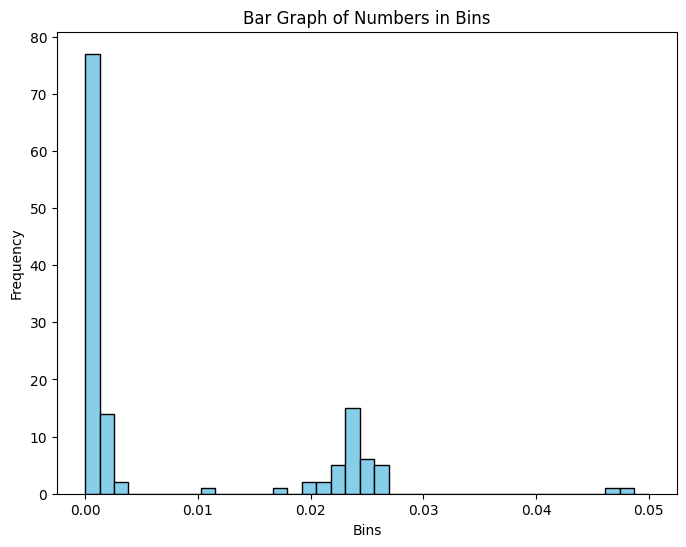

In [76]:
import matplotlib.pyplot as plt

bins = np.linspace(0, 0.05, 40)

bin_counts, bin_edges = np.histogram(importances, bins=bins)

plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', color='skyblue')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Bar Graph of Numbers in Bins')
plt.show()

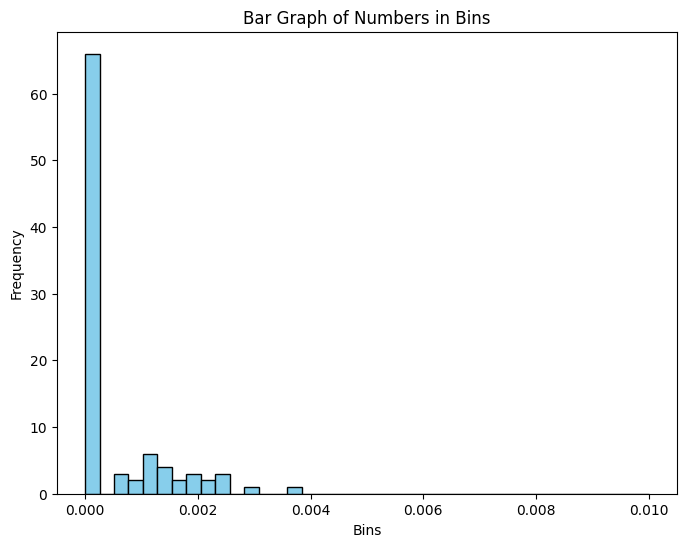

In [77]:
bins = np.linspace(0, 0.01, 40)

bin_counts, bin_edges = np.histogram(importances, bins=bins)

plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', color='skyblue')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Bar Graph of Numbers in Bins')
plt.show()

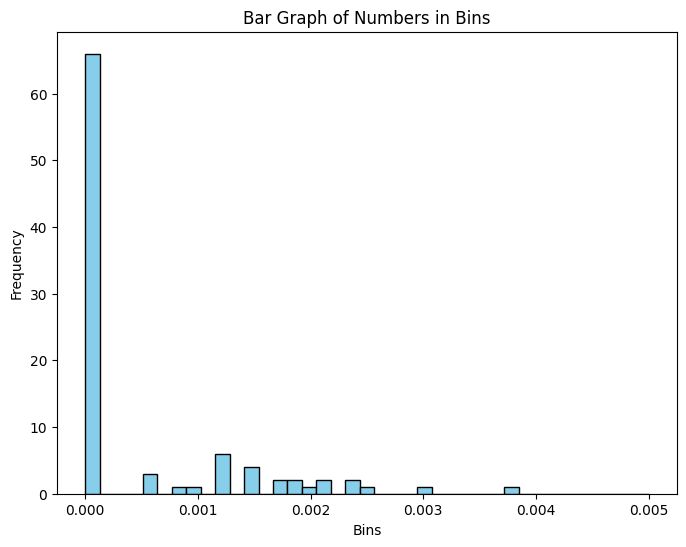

In [80]:
bins = np.linspace(0, 0.005, 40)

bin_counts, bin_edges = np.histogram(importances, bins=bins)

plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', color='skyblue')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Bar Graph of Numbers in Bins')
plt.show()

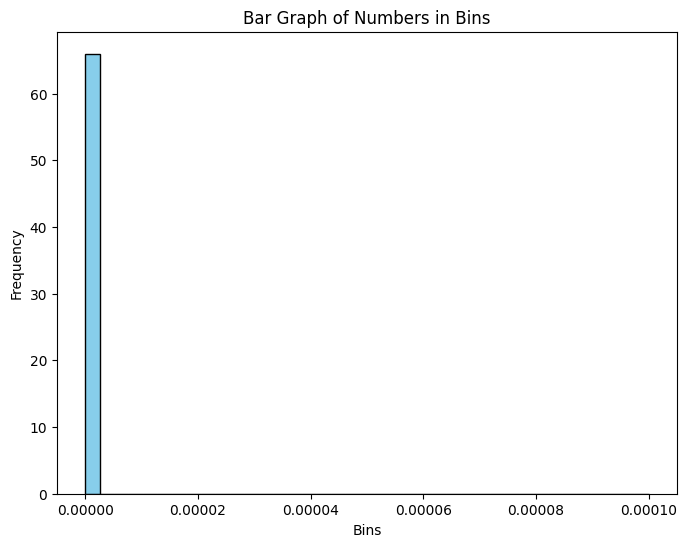

In [81]:
bins = np.linspace(0, 0.0001, 40)

bin_counts, bin_edges = np.histogram(importances, bins=bins)

plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', color='skyblue')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Bar Graph of Numbers in Bins')
plt.show()

In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

thresh = 0.0001 #from the graphs
selector = SelectFromModel(clf, threshold=thresh, prefit=True)
x_train_new = selector.transform(x_train)
print(x_train_new)

clf_new = RandomForestClassifier(random_state=42)
clf_new.fit(x_train_new, y_train)

scores = cross_val_score(clf_new, x_test, y_test, cv=3)

print (scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
1.0


In [93]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def get_scores(model, testx, testy, selector=None):
    if selector:
        testx = selector.transform(testx)
    y_pred = model.predict(testx)
    y_test = testy
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    print(f"F1-score (Macro average): {f1_macro}")
    print(f"F1-score (Weighted average): {f1_weighted}")

In [94]:
get_scores(clf,testx,testy)
get_scores(clf_new,testx,testy,selector)

F1-score (Macro average): 1.0
F1-score (Weighted average): 1.0
F1-score (Macro average): 1.0
F1-score (Weighted average): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [97]:
#saving the vocab, feature selector and model

import joblib

save_data = {
    "model" : clf_new,
    "selector" : selector,
    "vocab" : vocab,
    "le" : le
}

joblib.dump(save_data,'disease_model_data')

['disease_model_data']

In [99]:
#example case

symptomps1 = ['itching', 'acidity', 'fatigue']

model_data = joblib.load('/kaggle/working/disease_model_data')

model = model_data['model']
selector = model_data['selector']
vocab = model_data['vocab']
le = model_data['le']

In [108]:
x = [0] * len(vocab)
for s in symptomps1:
    idx = vocab.index(s)
    x[idx] = 1
x = np.array(x)
x = x.reshape(1,-1)
x = selector.transform(x)
print(x.shape)

(1, 66)


In [109]:
y_pred = model.predict(x)

In [111]:
y = le.inverse_transform(y_pred)
print(y)

['Jaundice']


In [11]:
import pandas as pd
disease = 'Jaundice'
descriptions = pd.read_csv('/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv')
desc = descriptions[descriptions['Disease'] == disease]
desc = desc['Description'].tolist()[0]
print(desc)

Yellow staining of the skin and sclerae (the whites of the eyes) by abnormally high blood levels of the bile pigment bilirubin. The yellowing extends to other tissues and body fluids. Jaundice was once called the "morbus regius" (the regal disease) in the belief that only the touch of a king could cure it


In [18]:
disease = 'Jaundice'
precautions = pd.read_csv('/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv')
precs = precautions[precautions['Disease'] == disease].iloc[:,1:]
precs_cols =  precs.columns
prec = []
for col in precs_cols:
    if precs[col].any():
        prec.append(precs[col].tolist()[0])
    
print(prec)

['drink plenty of water', 'consume milk thistle', 'eat fruits and high fiberous food', 'medication']
